In [85]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [86]:
def capture_image(device_path):
    # Open camera with specific device path
    cap = cv2.VideoCapture(device_path)

    # Check if camera opened successfully
    if not cap.isOpened():
        print("Error opening video stream or file")
        return None

    # Capture frame-by-frame
    ret, frame = cap.read()

    # If the frame was not captured successfully, return None
    if not ret:
        print("Error capturing frame")
        cap.release()
        return None

    # Release the camera
    cap.release()

    # Convert frame to image format
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Return the captured image
    return image


In [87]:
device = "/dev/video2"

In [88]:
image = capture_image(device)

[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (1758) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module source reported: Could not read from resource.
[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (888) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (480) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


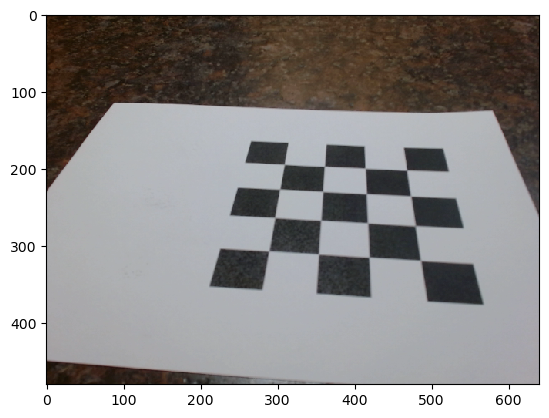

In [89]:
plt.imshow(image)

In [90]:
ret, corners = cv2.findChessboardCorners(image, (4,4), None)
print(ret)

True


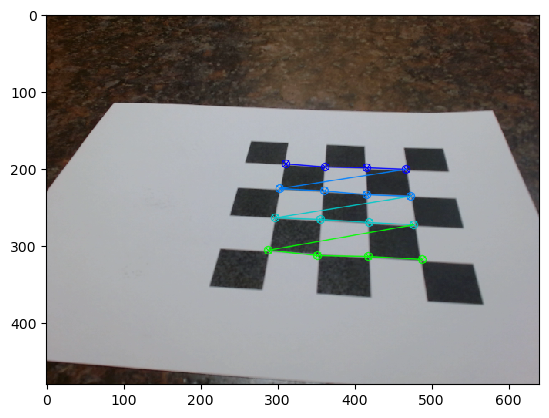

In [91]:
plt.imshow(cv2.drawChessboardCorners(image.copy(), (4,4), corners, ret))

/tmp/ipykernel_62070/2875295719.py:13: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image_cp, top_left, radius=5, color=(0, 0, 255), thickness=-1)
/tmp/ipykernel_62070/2875295719.py:14: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image_cp, top_right, radius=5, color=(0, 255, 0), thickness=-1)
/tmp/ipykernel_62070/2875295719.py:15: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(image_cp, bottom_right, radius=5, color=(255, 0, 0), thickness=-1)
/tmp/ipykernel_62070/2875295719.py:16: DeprecationWarning: an integer is required (got type numpy.float32).

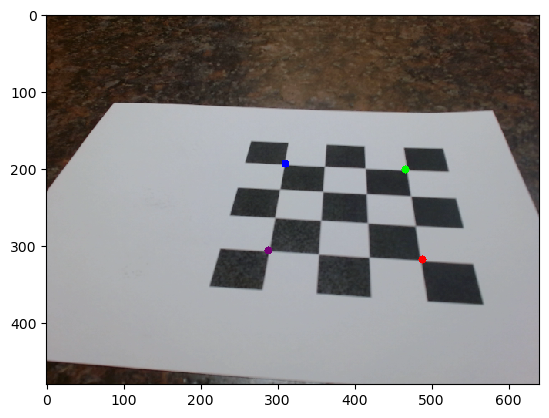

In [92]:
image_cp = image.copy()

# Extract the four corner points
top_left = tuple(corners[0][0])
top_right = tuple(corners[3][0])
bottom_left = tuple(corners[12][0])
bottom_right = tuple(corners[15][0])

# Create NumPy array of corner points
points = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

#Draw the points
cv2.circle(image_cp, top_left, radius=5, color=(0, 0, 255), thickness=-1)
cv2.circle(image_cp, top_right, radius=5, color=(0, 255, 0), thickness=-1)
cv2.circle(image_cp, bottom_right, radius=5, color=(255, 0, 0), thickness=-1)
cv2.circle(image_cp, bottom_left, radius=5, color=(120, 0, 120), thickness=-1)
plt.imshow(image_cp)

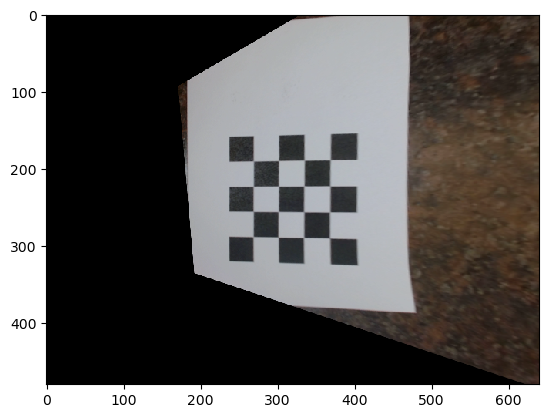

In [93]:
size = 25

y_mid = image.shape[0] / 2
x_mid = image.shape[1] / 2
# compute IPM matrix and apply it
                   # 
ipm_pts = np.array([[x_mid + size, y_mid - size],[x_mid + size, y_mid + size],[x_mid - size, y_mid - size],[x_mid - size, y_mid + size]], dtype=np.float32)
ipm_matrix = cv2.getPerspectiveTransform(points, ipm_pts)
ipm = cv2.warpPerspective(image, ipm_matrix, image.shape[:2][::-1])
plt.imshow(ipm)

In [94]:
cap = cv2.VideoCapture(device)

# Start capturing frames from the camera
while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break

    # Apply IPM transformation to the frame
    ipm = cv2.warpPerspective(frame, ipm_matrix, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

    # Display the transformed frame
    cv2.imshow('IPM Video', ipm)
    cv2.imshow("original",frame)

    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture device and destroy all windows
cap.release()
cv2.destroyAllWindows()

[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (1758) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module source reported: Could not read from resource.
[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (888) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (480) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
